In [1]:
import random

import pandas as pd

from jsontodf import *
from scipy import stats
import seaborn as sns

## Data exploration and analysis
This notebook aims to test some basic aspects of the data as well as test the pipeline parsing to ``Dataframe``. First, a few sanity checks:

In [2]:
test_emissions_df, test_no_emissions_df = jsontodf("../json_data/json_misc/compressed_test_json.json", two_returns=True)

In [3]:
test_emissions_df

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,0.1,0.0,0.0,0.0,206.0,0.000543,0.82945,206.0,100.0,100.0,0.121,0.973,0.195,0.000553


In [4]:
test_no_emissions_df

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p


In [5]:
test_events_df = jsontodf("../json_data/json_misc/compressed_test_json.json", two_returns=False)

In [6]:
test_events_df

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,emission,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,0.1,0.0,0.0,0.0,206.0,0.000543,0.82945,1,206.0,100.0,100.0,0.121,0.973,0.195,0.000553


### Time for the real deal
Now let's study a few aspects of one of the given data describing interactions in the lung!

In [7]:
%%time
lung_df = pd.read_pickle("../pickled_data/lung_dataset.pkl")

CPU times: total: 1.38 s
Wall time: 7.58 s


In [8]:
lung_df.head(50)

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,emission,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,1.0,0.0,0.0,0.1,206.00,0.000543,0.829450,1,206.00,100.0,100.0,0.121,0.9730,0.1950,0.000553
1,0.0,100.0,100.0,1.0,0.0,0.0,0.1,791.00,0.000014,-0.960107,1,791.00,100.0,100.0,0.987,-0.0925,-0.1280,0.027100
2,0.0,100.0,100.0,1.0,0.0,0.0,0.1,800.00,0.000042,0.539941,1,800.00,100.0,100.0,0.548,0.6300,0.5510,0.008040
3,0.0,100.0,100.0,1.0,0.0,0.0,0.1,570.00,0.000014,-0.984238,1,570.00,100.0,100.0,0.906,0.0289,0.4220,0.022600
4,0.0,100.0,100.0,1.0,0.0,0.0,0.1,38.30,0.000014,0.931009,1,38.30,100.0,100.0,0.325,-0.4870,0.8110,0.002180
5,0.0,100.0,100.0,1.0,0.0,0.0,0.1,607.00,0.000042,-0.555998,1,607.00,100.0,100.0,0.900,-0.2310,0.3690,0.021800
6,0.0,100.0,100.0,1.0,0.0,0.0,0.1,283.00,0.000042,0.824379,1,283.00,100.0,100.0,0.420,0.4370,0.7950,0.004630
7,0.0,100.0,100.0,1.0,0.0,0.0,0.1,510.00,0.000017,-0.382179,1,510.00,100.0,100.0,0.885,0.4190,-0.2020,0.022400
8,0.0,100.0,100.0,1.0,0.0,0.0,0.1,133.00,0.000014,-0.226209,1,133.00,100.0,100.0,0.859,0.5110,-0.0201,0.020300
9,0.0,100.0,100.0,1.0,0.0,0.0,0.1,7.66,0.000029,-0.796440,1,7.66,100.0,100.0,0.979,-0.2020,-0.0190,0.026500


We first divert our attention the distribution of emissions.

In [9]:
lung_total = len(lung_df)

In [10]:
emissions_total = len(lung_df[lung_df["emission"] == 1])

In [11]:
p_emission = emissions_total/lung_total
print(f"Probability of an emission is {p_emission}.")

Probability of a collision is 0.952488171342006.


Is there a correlation between incoming particle parameters and the presence (or not) of an emission?

In [12]:
stats.spearmanr(lung_df["en_p"], lung_df["emission"])

SpearmanrResult(correlation=-0.026972636265126276, pvalue=0.0)

In [13]:
stats.spearmanr(lung_df["dist_p"], lung_df["emission"])

SpearmanrResult(correlation=-0.3029722366303757, pvalue=0.0)

Notice the extremely small p-values (0 in fact), thanks to the size of our dataset. Thus we can extremely confidently reject the hypothesis that incoming energy and travelled distance are uncorrelated from emission - which makes sense.

Now for the correlations with the outputs:

In [14]:
stats.spearmanr(lung_df["de_p"], lung_df["emission"])

SpearmanrResult(correlation=0.36266808203985323, pvalue=0.0)

In [15]:
stats.spearmanr(lung_df["cos_p"], lung_df["emission"])

SpearmanrResult(correlation=-0.3413699770486681, pvalue=0.0)

Here again, no surprises that the fact an emission happened has major impact on the energy delta and the rotation of the incoming particle.

Let's have a look at a few other basic distributions.

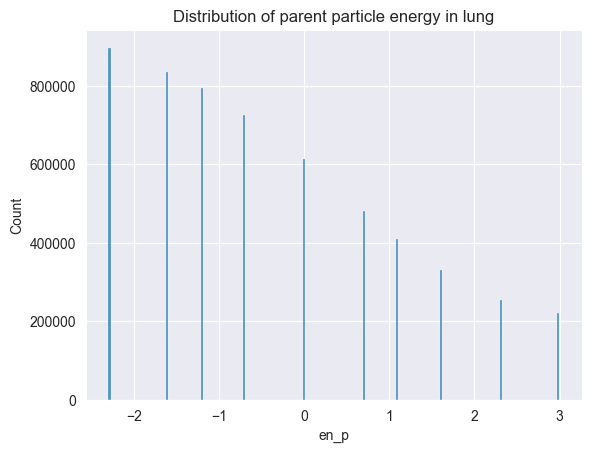

In [16]:
sns.histplot(lung_df["en_p"].apply(np.log)).set(title="Distribution of parent particle energy in lung");

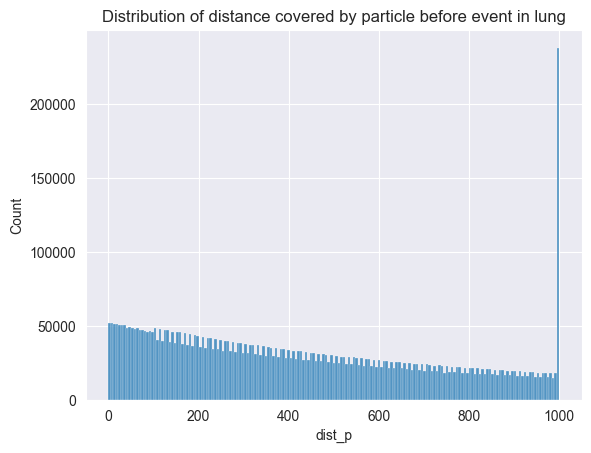

In [17]:
sns.histplot(lung_df["dist_p"]).set(title="Distribution of distance covered by particle before event in lung");

The spike at $1000$ corresponds to the step limit, i.e to the max distance a particle can cover in a step.

In [18]:
step_limit_df = lung_df[lung_df['dist_p'] == lung_df['dist_p'].max()]

In [19]:
step_limit_count = len(step_limit_df)
p_step_limit = step_limit_count/lung_total
print(f"Probability of reaching the step limit: {p_step_limit}")

Probability of reaching the step limit: 0.040177477013924996


In [20]:
emissions_when_step_limit = len(step_limit_df[step_limit_df["emission"] == 1])
p_emission_cond_step_limit = emissions_when_step_limit/step_limit_count
print(f"Probability of emission when reaching step limit (i.e P(emission | step_limit reached)): {p_emission_cond_step_limit}")

Probability of emission when reaching step limit (i.e P(emission | step_limit reached)): 0.006624647981762103


Let's understand whether the distance covered follows a power law or an exponential distribution, by looking at the plot in log-log:

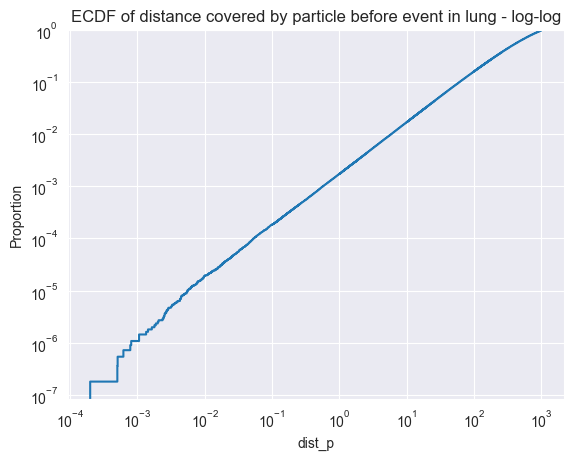

In [21]:
sns.ecdfplot(lung_df["dist_p"], log_scale=(True,True)).set(title="ECDF of distance covered by particle before event in lung - log-log");

Data looks quite linear on a log-log, indicating a possible exponential distribution. Let's test that:

In [22]:
stats.kstest(lung_df['dist_p'], "expon")

KstestResult(statistic=0.9876483386806564, pvalue=0.0)

Test says ``dist_p`` is not exponentially distributed, interestingly. Could that be because of the lack of accuracy for small distances? (smaller than $10^{-2}$)

In [23]:
stats.kstest(lung_df[lung_df['dist_p'] > 0.01]['dist_p'], "expon")

KstestResult(statistic=0.987667173049901, pvalue=0.0)

Looks like the hypothesis of an exponential distribution is to be rejected, and that the distance covered actually follows a power law.

Checking whether initial energy and distance travelled are correlated:

In [24]:
stats.spearmanr(lung_df['dist_p'], lung_df['en_p'])

SpearmanrResult(correlation=0.17752351858864154, pvalue=0.0)

They definitely are but not much. What about the emission indicator?

In [25]:
stats.spearmanr(lung_df['dist_p'], lung_df['emission'])

SpearmanrResult(correlation=-0.3029722366303757, pvalue=0.0)

In [26]:
for i in [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]:
    p = len(lung_df[(lung_df['en_p'] == i) & (lung_df['emission'] == 1)])/len(lung_df[(lung_df['en_p'] == i)])
    print(f"For energy {i}, proba of emission: {p}")

For energy 0.1, proba of emission: 0.948436107645696
For energy 0.2, proba of emission: 0.9623610566860048
For energy 0.3, proba of emission: 0.9636030855681211
For energy 0.5, proba of emission: 0.9600797524922654
For energy 1.0, proba of emission: 0.9544404502808141
For energy 2.0, proba of emission: 0.946402200245578
For energy 3.0, proba of emission: 0.9432907523721412
For energy 5.0, proba of emission: 0.9386179906012482
For energy 10.0, proba of emission: 0.9349576627820034
For energy 20.0, proba of emission: 0.9324736342280202


In [27]:
stats.spearmanr(lung_df['en_p'], lung_df['emission'])

SpearmanrResult(correlation=-0.026972636265126276, pvalue=0.0)

Now, let's look at the particle rotation:

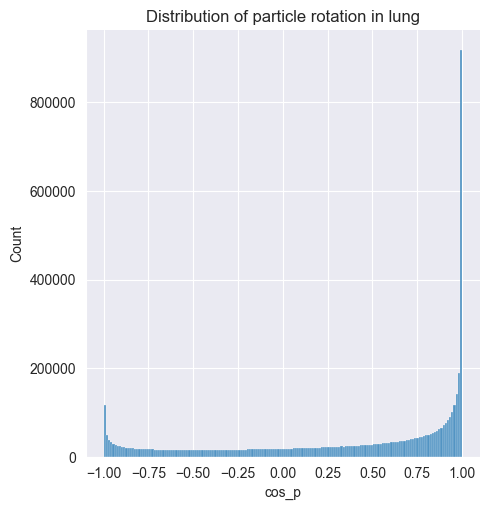

In [28]:
sns.displot(lung_df['cos_p']).set(title="Distribution of particle rotation in lung");

Rotation seems roughly centered at $0$ degrees, with an additive delta at $0$ maybe due to particles that do not emit any other ones? Let's check that:

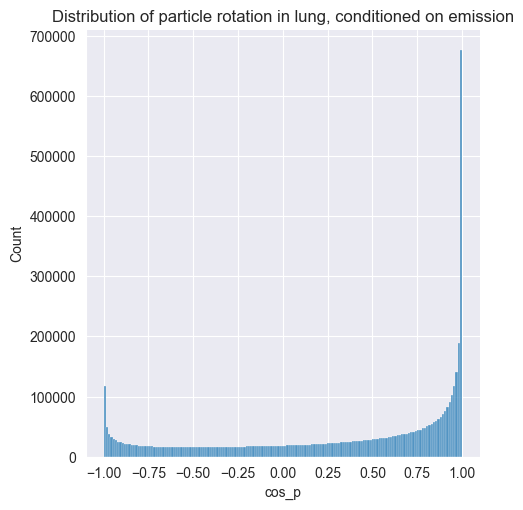

In [29]:
sns.displot(lung_df[lung_df['emission'] == 1]['cos_p']).set(title="Distribution of particle rotation in lung, conditioned on emission");

Don't forget looking at the y-axis. Indeed the spike at $0$ degree rotation has diminished, although not by that much. Let's quickly check that particles that do not emit a new one are not rotated much:

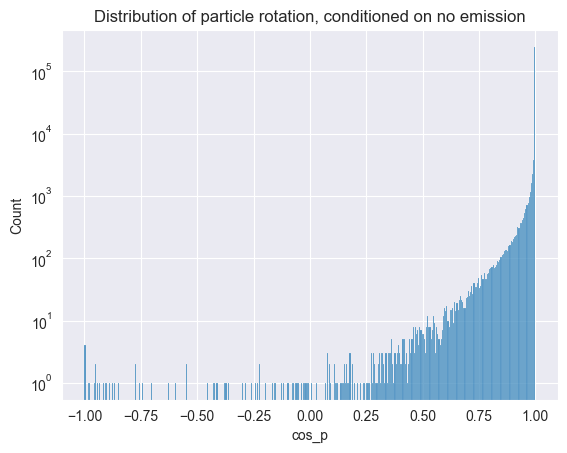

In [58]:
sns.histplot(lung_df[lung_df['emission'] == 0]['cos_p'], bins=400, log_scale=(False, True)).set(title="Distribution of particle rotation, conditioned on no emission");

In [31]:
lung_df_no_emissions = lung_df[lung_df["emission"] == 0]

In [57]:
len(lung_df_no_emissions[lung_df_no_emissions["cos_p"] > 0.98])/len(lung_df_no_emissions)

0.955898362489983

<AxesSubplot: xlabel='de_p', ylabel='Count'>

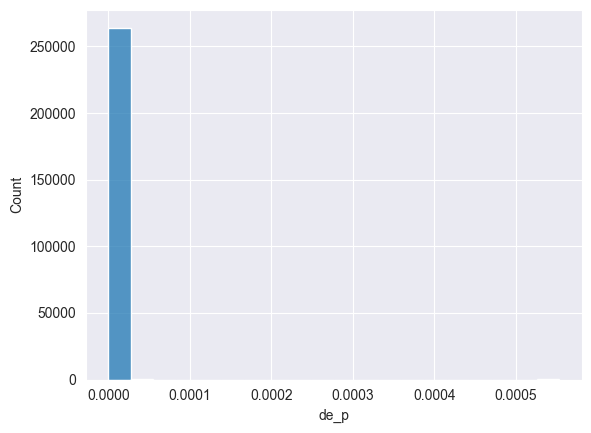

In [32]:
sns.histplot(lung_df_no_emissions["de_p"])

In [45]:
stats.spearmanr(lung_df_no_emissions["cos_p"], lung_df_no_emissions["dist_p"])

SpearmanrResult(correlation=0.9901339001095211, pvalue=0.0)

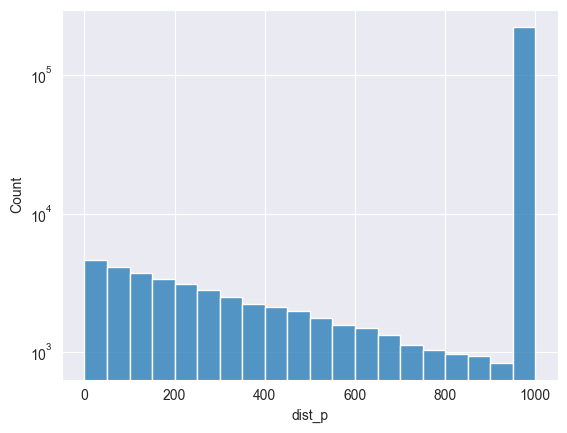

In [59]:
sns.histplot(lung_df_no_emissions["dist_p"], log_scale=(False, True));

In [51]:
stats.spearmanr(lung_df_no_emissions["cos_p"], lung_df_no_emissions["en_p"])

SpearmanrResult(correlation=0.5153198184714143, pvalue=0.0)

In [46]:
lung_df_emissions = lung_df[lung_df["emission"] == 1]

In [49]:
stats.spearmanr(lung_df_emissions["cos_p"], lung_df_emissions["dist_p"])

SpearmanrResult(correlation=0.04830371259298409, pvalue=0.0)

SpearmanrResult(correlation=0.04830371259298409, pvalue=0.0)

SpearmanrResult(correlation=0.04830371259298409, pvalue=0.0)

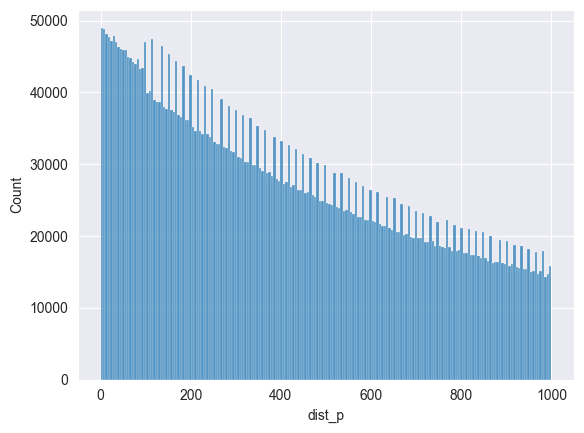

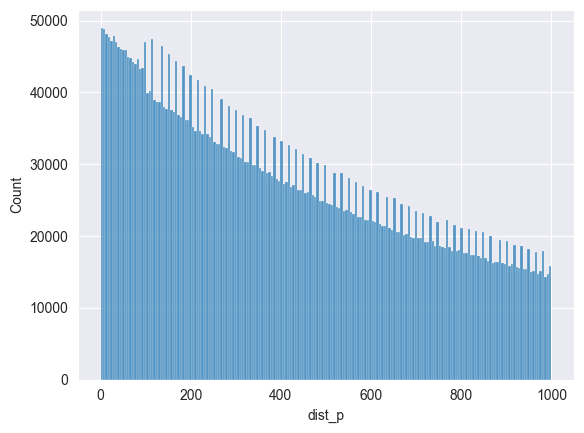

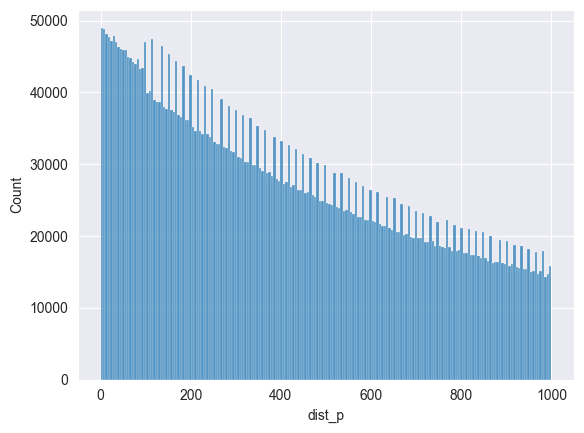

In [54]:
sns.histplot(lung_df_emissions["dist_p"]);

Now, we do similar tests for the water dataset just to check that things aren't crazily different:

In [33]:
water_df = pd.read_pickle("../pickled_data/water_dataset.pkl")
water_df.head(40)

,x_p,y_p,z_p,dx_p,dy_p,dz_p,en_p,dist_p,de_p,cos_p,emission,x_c,y_c,z_c,dx_c,dy_c,dz_c,en_c
0,0.0,100.0,100.0,0.1,0.0,0.0,0.0989,25.50,0.000543,0.829450,1,25.50,100.0,100.0,0.121,0.97300,0.1950,0.000553
1,0.0,100.0,100.0,0.1,0.0,0.0,0.0951,27.30,0.000543,0.665948,1,27.30,100.0,100.0,0.243,0.81500,-0.5270,0.004340
2,0.0,100.0,100.0,0.1,0.0,0.0,0.0741,35.30,0.000029,-0.918817,1,35.30,100.0,100.0,0.991,-0.10900,0.0824,0.025900
3,0.0,100.0,100.0,0.1,0.0,0.0,0.1000,59.20,0.000000,0.790787,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,100.0,100.0,0.1,0.0,0.0,0.0837,61.20,0.000543,-0.911213,1,61.20,100.0,100.0,0.968,0.22400,-0.1140,0.015800
5,0.0,100.0,100.0,0.1,0.0,0.0,0.0952,139.00,0.000543,0.759469,1,139.00,100.0,100.0,0.344,0.50400,0.7920,0.004280
6,0.0,100.0,100.0,0.1,0.0,0.0,0.0984,56.40,0.000029,0.845926,1,56.40,100.0,100.0,0.269,-0.96200,0.0476,0.001550
7,0.0,100.0,100.0,0.1,0.0,0.0,0.0693,113.00,0.000543,-0.989542,1,113.00,100.0,100.0,0.836,0.02030,-0.5480,0.030200
8,0.0,100.0,100.0,0.1,0.0,0.0,0.0871,33.70,0.000029,0.597081,1,33.70,100.0,100.0,0.660,-0.20700,-0.7220,0.012900
9,0.0,100.0,100.0,0.1,0.0,0.0,0.0885,281.00,0.000029,0.328913,1,281.00,100.0,100.0,0.586,-0.51500,0.6250,0.011500


In [34]:
len(water_df)

8818755

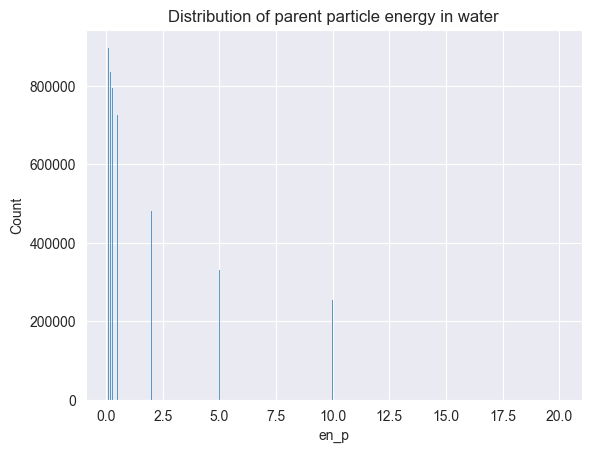

In [35]:
sns.histplot(lung_df["en_p"]).set(title="Distribution of parent particle energy in water");

Nothing changed much there.

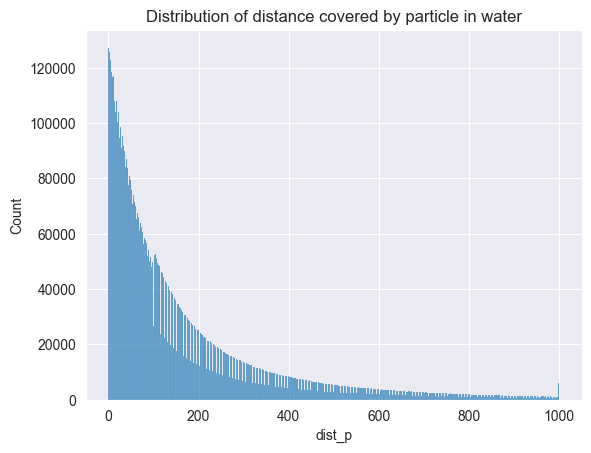

In [36]:
sns.histplot(water_df["dist_p"]).set(title="Distribution of distance covered by particle in water");

Interestingly, much less particles reach the step limit.

In [37]:
step_limit_df = water_df[water_df['dist_p'] == water_df['dist_p'].max()]

In [38]:
step_limit_count = len(step_limit_df)
p_step_limit = step_limit_count/len(water_df)
print(f"Probability of reaching the step limit: {p_step_limit}")

Probability of reaching the step limit: 0.0006067749926151708


Can this have anything do with the probability of emission?

In [39]:
emission_count = len(water_df[water_df["emission"] == 1])
p_emission = emission_count/len(water_df)
print(f"Probability of emission: {p_emission}")

Probability of emission: 0.9936640716291585


In this indeed much higher than in the lung. Lastly, for the correlation between energy and distance, which was noticeably low for the lungs:

In [40]:
stats.spearmanr(water_df['dist_p'], water_df['en_p'])

SpearmanrResult(correlation=0.3321852443114158, pvalue=0.0)

It's a bit higher here. We expect quite different models, although a very similar ML system architecture can still be used for both datasets.

About test data:

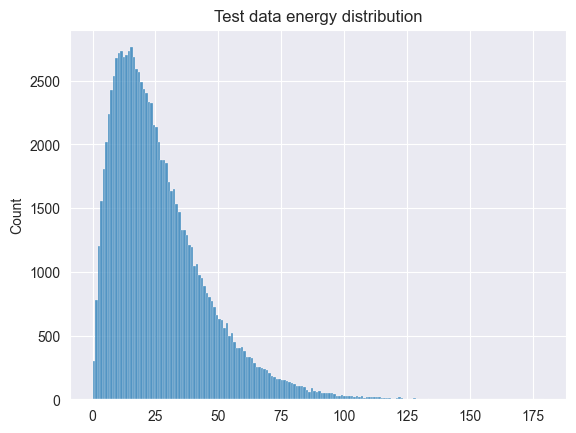

In [41]:
sns.histplot(data=np.array([20 * random.gammavariate(2.0, 0.667) for _ in range(100000)])).set(title="Test data energy distribution");

In [42]:
import math

NMC = 100000  # number of particles we want to simulate

arr = np.zeros(NMC)
for i in range(NMC):
    s = random.gauss(0.0, 0.1)
    ydir = 0.2 * s
    s = random.gauss(0.0, 0.1)
    zdir = 0.2 * s
    xdir = math.sqrt(1 - ydir ** 2 - zdir ** 2)
    arr[i] = xdir

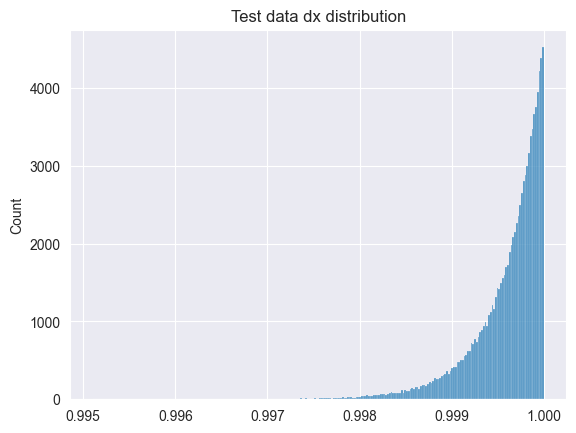

In [43]:
sns.histplot(arr).set(title="Test data dx distribution");

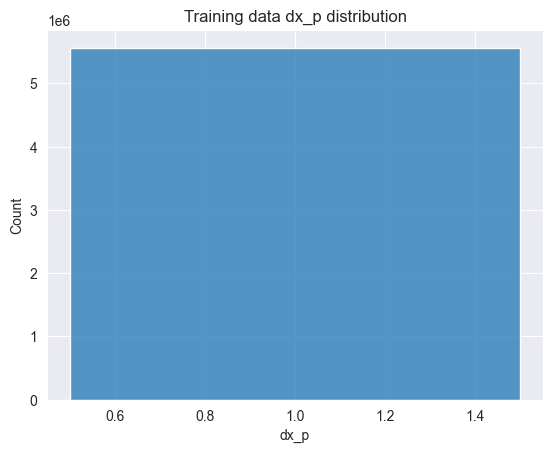

In [44]:
sns.histplot(lung_df["dx_p"]).set(title="Training data dx_p distribution");